## Project:
# *Salaries of San Francisco Employees* 

- **Domain:** Finance Analytics  
- **Project Type:** Exploratory Data Analysis (EDA)  
- **Tools Used:** Python, Pandas, NumPy, Matplotlib, Seaborn 

## **Introduction**
This project focuses on analyzing the salary structure of San Francisco employees. The dataset includes information about employee roles, base pay, overtime pay, benefits, and total compensation. The goal of this analysis is to understand salary patterns, identify trends, and gain insights into employee compensation across different job roles and years.

## **Objectives**
- Analyze salary distribution of employees  
- Compare base pay, overtime pay, and total compensation  
- Identify high-paying job roles  
- Understand trends in employee salaries

## **Dataset Description**

The dataset contains salary information of employees working in San Francisco.  
It provides detailed information about employee compensation, including base pay, overtime pay, benefits, and total salary.

### Key Columns

- **Id** – Unique identifier for each employee record  
- **EmployeeName** – Name of the employee  
- **JobTitle** – Job role/designation of the employee  
- **BasePay** – Base salary paid to the employee  
- **OvertimePay** – Additional pay for overtime work  
- **OtherPay** – Other types of compensation  
- **Benefits** – Benefits received by the employee  
- **TotalPay** – Sum of base pay, overtime pay, and other pay  
- **TotalPayBenefits** – Total compensation including benefits  
- **Year** – Year of the salary record  

The dataset is used to perform data cleaning, exploratory data analysis, and to understand salary patterns across different job roles and years.


## **Importing the Dataset**

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Display all columns

pd.set_option('display.max_columns', None)

In [5]:
df=pd.read_csv(r"C:\Users\sathv\Downloads\Total.csv")

C:\Users\sathv\AppData\Local\Temp\ipykernel_7516\892881426.py:1: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\sathv\Downloads\Total.csv")


In [7]:
#Showing 1st five Rows

df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


## **Data Overview and Understanding**
In this step, the dataset is explored to understand its structure, data types, and basic statistics.  
This helps identify missing values, incorrect data types, and gives an overall idea of the dataset before cleaning.


In [5]:
df.shape

(312882, 9)

In [6]:
# Check basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


In [7]:
# statistical summary of numerical columns

df.describe()

,TotalPay,TotalPayBenefits,Year
count,312882.000000,312882.000000,312882.000000
mean,78802.645788,100928.339777,2014.625303
std,53230.758542,66485.186495,2.290899
min,-618.130000,-3628.780000,2011.000000
25%,38803.000000,48955.072500,2013.000000
50%,74908.790000,100011.290000,2015.000000
75%,111386.897500,142376.300000,2017.000000
max,592394.340000,712802.360000,2018.000000


In [8]:
# column names

df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

## **Data Preprocessing / Data Cleaning**
In this step, the dataset is cleaned by handling missing values and fixing incorrect data types. Cleaning the data is important to ensure accurate analysis and meaningful insights.

In [9]:
# Checking missing values

df.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [10]:
# Replacing missing salary values with 0

salary_cols = ["BasePay", "OvertimePay", "OtherPay", "Benefits"]
df[salary_cols] = df[salary_cols].fillna(0)


In [11]:
# Checking again after cleaning

df.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [12]:
# Removing duplicate rows

df.drop_duplicates(inplace=True)

In [13]:
# Handling missing Job Titles
# Replaing missing Jobtitle with Unknowm

df["JobTitle"]= df["JobTitle"].fillna("Unknown")

In [14]:
# Removing extra spaces

df["JobTitle"]= df["JobTitle"].str.strip()

In [11]:
# Converting salary columns into numeric 

salary_cols = ["BasePay", "OvertimePay", "OtherPay", "Benefits", "TotalPay", "TotalPayBenefits"]

for col in salary_cols:
    df[col] = pd.to_numeric(df[col], errors= "coerce")

In [16]:
# Removing rows where Year is missing

df= df.dropna(subset=["Year"])

## Final Cleaned Dataset

In [17]:
df

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
312877,Daniel W Plautz,Public Service Trainee,0.00,0.00,0.00,0.0,0.00,0.00,2018
312878,David J Thompson,Deputy Sheriff,0.00,0.00,0.00,0.0,0.00,0.00,2018
312879,Keiko Weng Yee Lau,Public Service Trainee,0.00,0.00,0.00,0.0,0.00,0.00,2018
312880,David Wong,Deputy Sheriff,0.00,0.00,0.00,0.0,0.00,0.00,2018


## **Data Profiling using YdataProfiling**
YData Profiling is used to generate an automated and detailed report of the dataset. It helps to quickly understand data types, missing values, distributions, correlations, and potential data quality issues.

In [37]:
from ydata_profiling import ProfileReport

In [38]:
profile = ProfileReport(df, title="San Francisco Employee Salaries Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                            | 0/9 [00:00<?, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  1.82it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **Exploratary Data Anaalysis**


### EDA 1. Distribution of Total Pay Benefits

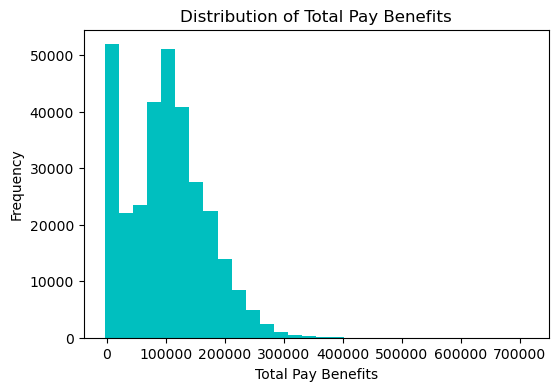

In [16]:
# 1. Distribution of Total Pay Benefits
%matplotlib inline

# Plot

plt.figure(figsize=(6,4))
plt.hist(df['TotalPayBenefits'], bins=30, color="c")
plt.title("Distribution of Total Pay Benefits")
plt.xlabel("Total Pay Benefits")
plt.ylabel("Frequency")
plt.show()

**Key Insight:**
- The distribution of total pay benefits is right-skewed, showing that most employees earn low to mid-level salaries. Only a small number of employees receive very high compensation, creating a long tail in the distribution.

### EDA 2. Top 10 Highest Paying Job Titles

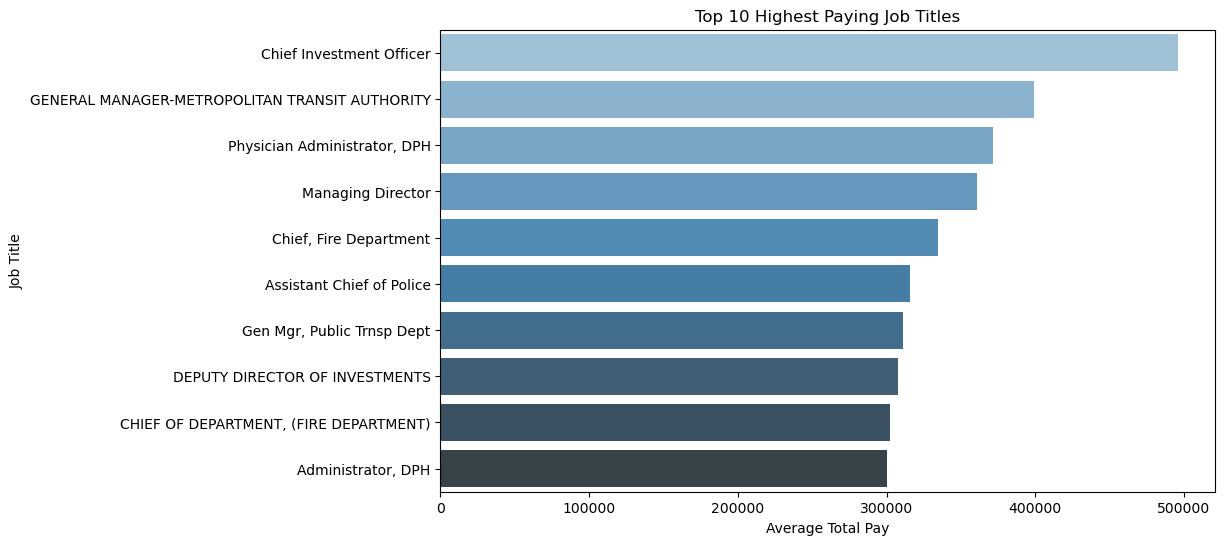

In [17]:
# Group by job title and calculate mean TotalPay

job_salary = (df.groupby('JobTitle')['TotalPay'].mean()
    .sort_values(ascending=False).head(10))

# Plot

plt.figure(figsize=(10,6))

sns.barplot(x=job_salary.values, y=job_salary.index, hue=job_salary.index, palette='Blues_d', legend=False)

plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Total Pay')
plt.ylabel('Job Title')
plt.show()

**Key Insights:**
- The chart shows that executive and senior leadership roles receive the highest average salaries. Higher responsibility and managerial positions are strongly associated with higher compensation.

### EDA 3. Salary Trend Over the Years 

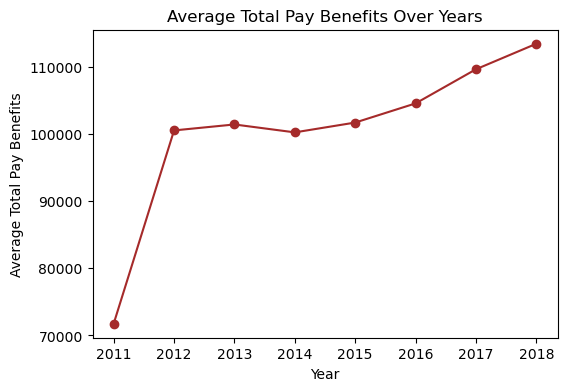

In [19]:
yearly_avg = df.groupby('Year')['TotalPayBenefits'].mean()

# Plot

plt.figure(figsize=(6,4))
plt.plot(yearly_avg.index, yearly_avg.values,color="brown", marker='o')
plt.title("Average Total Pay Benefits Over Years")
plt.xlabel("Year")
plt.ylabel("Average Total Pay Benefits")
plt.show()

**Key Insights:**
- Average total pay benefits show an overall increasing trend over the years. Despite minor fluctuations, employee compensation has steadily grown over time.

### EDA 4. Average Total Pay Over the Years

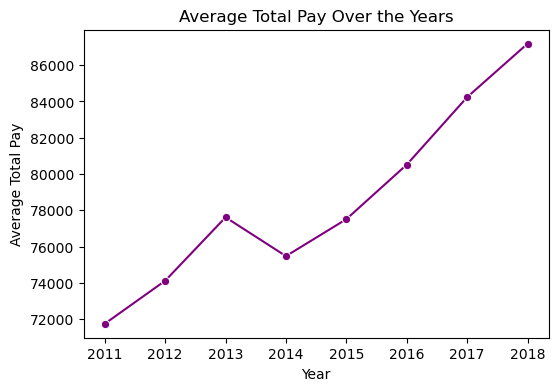

In [20]:
pay_over_years = df.groupby('Year')['TotalPay'].mean()

# Plot
plt.figure(figsize=(6,4))
sns.lineplot(x=pay_over_years.index, y=pay_over_years.values,
             marker="o", color="purple")
plt.title("Average Total Pay Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Total Pay")
plt.show()

**Key Insights:**
- The average total pay demonstrates gradual growth across years with a slight dip in the middle period. Overall, the trend indicates consistent salary increases.

### EDA 5. Salary Range by Job Title

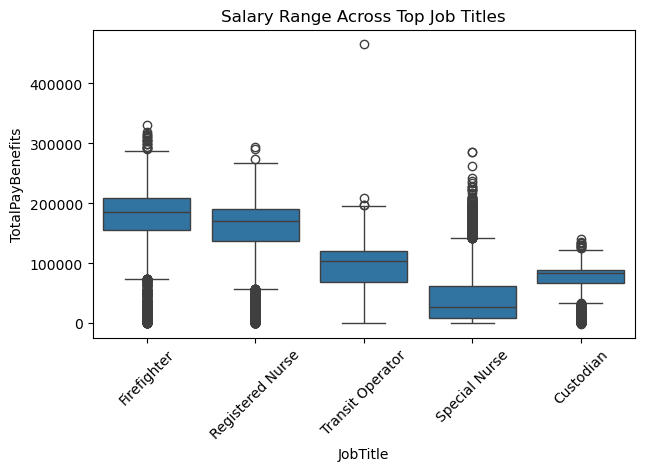

In [21]:
top_roles = df['JobTitle'].value_counts().head(5).index
filtered_df = df[df["JobTitle"].isin(top_roles)]

# Plot

plt.figure(figsize=(7,4))
sns.boxplot(x="JobTitle", y="TotalPayBenefits", data=filtered_df)
plt.title("Salary Range Across Top Job Titles")
plt.xticks(rotation=45)
plt.show()

**Key Insights:**
- Salary distributions vary significantly across job titles. Some roles show higher median salaries and wider ranges, while others have more concentrated pay levels with fewer high earners.

### EDA 6. Base Pay vs Total Compensation

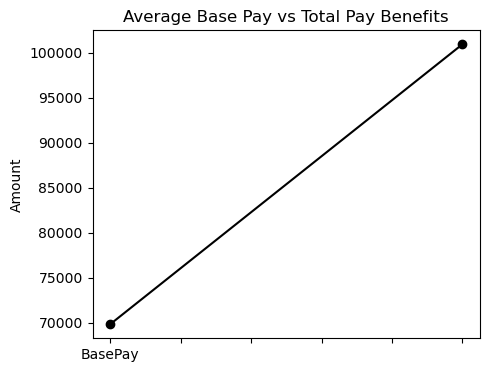

In [22]:
avg_pay = df[['BasePay', 'TotalPayBenefits']].mean()

# Plot
plt.figure(figsize=(5,4))
avg_pay.plot(kind='line', marker='o',color="black")
plt.title("Average Base Pay vs Total Pay Benefits")
plt.ylabel("Amount")
plt.show()

**Key Insights:**
- Total pay benefits are noticeably higher than base pay, highlighting the impact of additional salary components. This shows that base salary alone does not reflect total employee earnings.

### EDA 7. Employees Receiving Overtime Pay

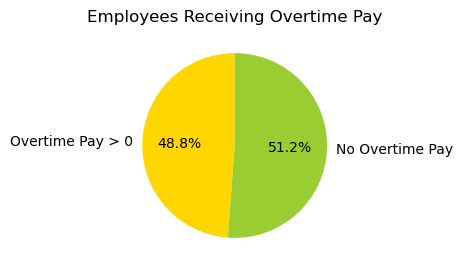

In [23]:
custom_colors= ['#FFD700', 'yellowgreen']
overtime_counts = [
    (df['OvertimePay'] > 0).sum(),
    (df['OvertimePay'] == 0).sum()]

# Plot
plt.figure(figsize=(5,3))
plt.pie(overtime_counts, labels=['Overtime Pay > 0',
                                 'No Overtime Pay'],
        startangle=90, colors=custom_colors, 
        autopct='%1.1f%%')
plt.title("Employees Receiving Overtime Pay")
plt.show()

**Key Insights:**
- The chart indicates that overtime pay is received by a significant portion of employees, but not by all. This suggests that overtime compensation depends on job role and work nature.

### EDA 8. Total Salary Expenditure by Year

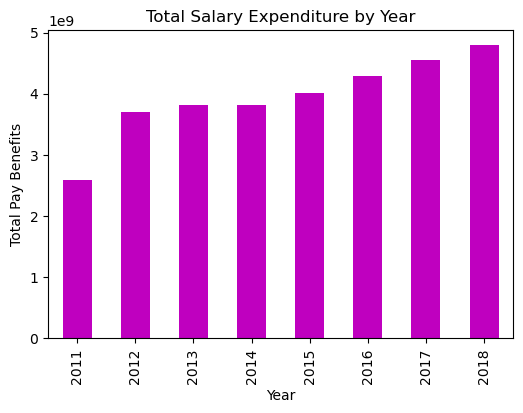

In [24]:
yearly_total = df.groupby('Year')['TotalPayBenefits'].sum()

# Plot
plt.figure(figsize=(6,4))
yearly_total.plot(kind='bar',color= "m")
plt.title("Total Salary Expenditure by Year")
plt.xlabel("Year")
plt.ylabel("Total Pay Benefits")
plt.show()

**Key Insights:**
- Total salary expenditure increases steadily across years, reflecting growth in workforce cost and compensation levels. This trend suggests organizational expansion and salary revisions.

### EDA 9. Benefits Distribution

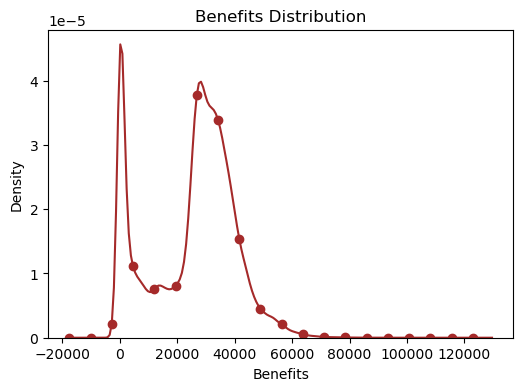

In [25]:
# Plot

plt.figure(figsize=(6,4))
sns.kdeplot(df['Benefits'], marker='o', markevery=10, color= "brown")
plt.title("Benefits Distribution")
plt.xlabel("Benefits")
plt.ylabel("Density")
plt.show()


**Key Insights:**
- Most employees receive low to moderate benefits, while only a few receive very high benefits. The right-skewed distribution highlights inequality in benefits allocation.

### EDA 10. Distribution of BasePay, OvertimePay, and OtherPay

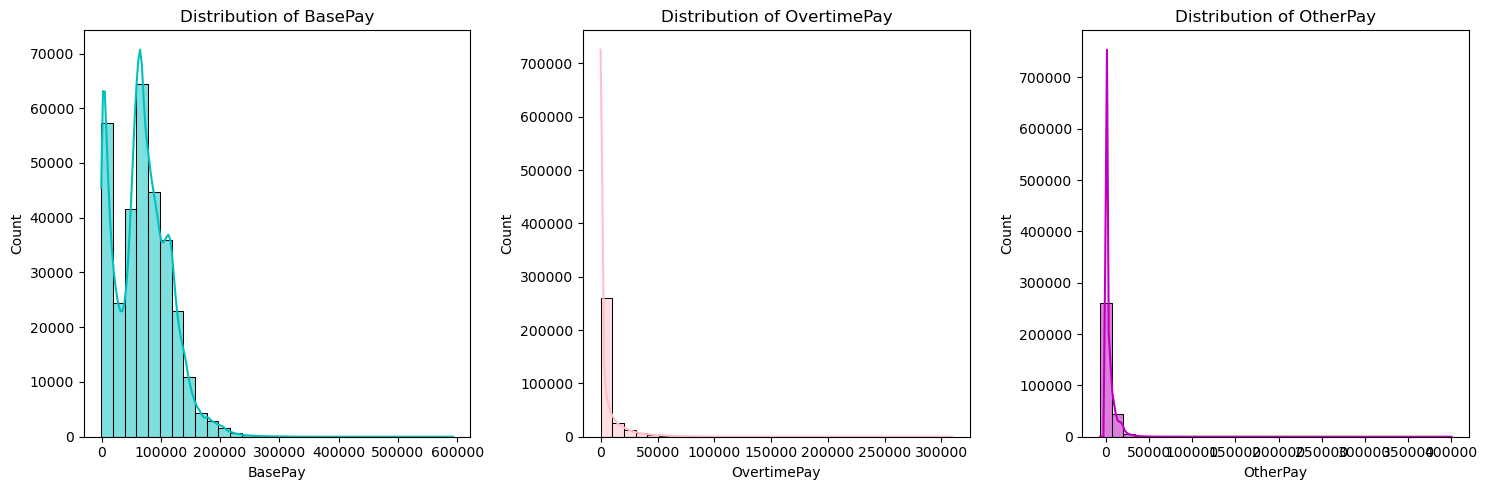

In [26]:
# Plot histograms for BasePay, OvertimePay, and OtherPay

# Plot

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['BasePay'], bins=30, kde=True, color='c')
plt.title('Distribution of BasePay')

plt.subplot(1,3,2)
sns.histplot(df['OvertimePay'], bins=30, kde=True, color='pink')
plt.title('Distribution of OvertimePay')

plt.subplot(1,3,3)
sns.histplot(df['OtherPay'], bins=30, kde=True, color='m')
plt.title('Distribution of OtherPay')
plt.tight_layout()
plt.show()

**Key Insights:**
- BasePay is the most consistent and dominant salary component.
- OvertimePay and OtherPay are concentrated near lower values, with only a few employees receiving high additional pay.

### EDA 11. Top 10 Job Titles by Benefits

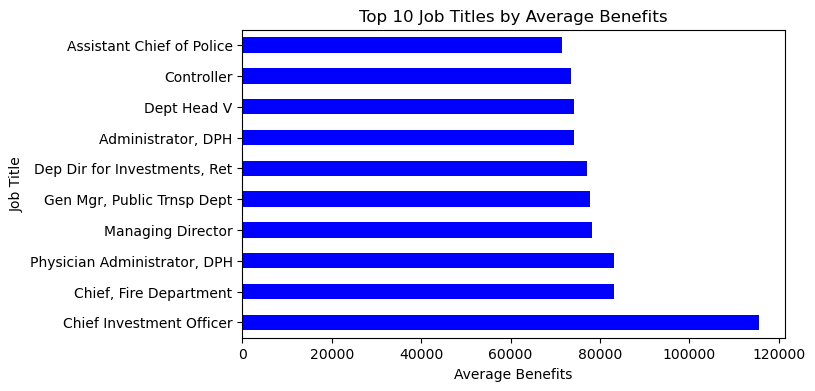

In [27]:
top_benefits_jobs = df.groupby('JobTitle')['Benefits'].mean().sort_values(ascending=False).head(10)

# Plot 

plt.figure(figsize=(7,4))
top_benefits_jobs.plot(kind='barh', color ="b")
plt.title("Top 10 Job Titles by Average Benefits")
plt.xlabel("Average Benefits")
plt.ylabel("Job Title")
plt.show()


**Key Insights:**
- Senior administrative and leadership roles receive the highest benefits on average. This indicates that benefits increase with job level and responsibility.

### EDA 12. Average Salary Components Contribution

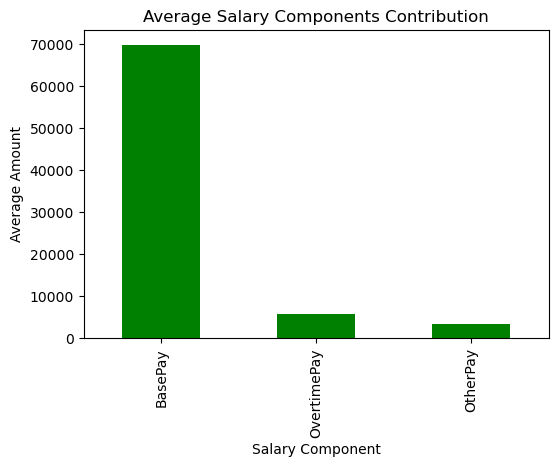

In [28]:
# How BasePay, OvertimePay, OtherPay contribute to total

salary_components = df[['BasePay', 'OvertimePay', 'OtherPay']].mean()

# Plot

plt.figure(figsize=(6,4))
salary_components.plot(kind='bar',color="g")
plt.title("Average Salary Components Contribution")
plt.ylabel("Average Amount")
plt.xlabel("Salary Component")
plt.show()


**Key Insights:**
- BasePay contributes the largest share to total salary, while OvertimePay and OtherPay contribute smaller portions. This confirms that fixed pay is the primary income source.

### EDA 13. Percentage of Employees With vs Without Benefits 

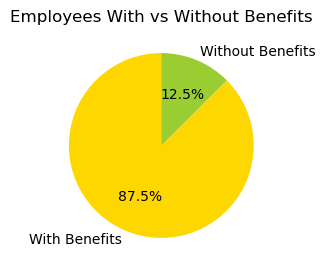

In [15]:
df['has_benefits'] = df['Benefits'].apply(lambda x: 'With Benefits' if x > 0 else 'Without Benefits')

benefit_counts = df['has_benefits'].value_counts()

# Plot

plt.figure(figsize=(5,3))
plt.pie(benefit_counts,
        labels=benefit_counts.index,
        autopct='%1.1f%%', colors =custom_colors,
        startangle=90)

plt.title("Employees With vs Without Benefits")
plt.show()

**Key Insights:**
- Most employees receive benefits as part of their compensation. Only a small percentage of employees do not receive benefits, making benefits a standard component of pay structure.

## Salary Prediction with Machine Learning
- In this section, a machine learning approach is used to predict employee total compensation.
- Based on the insights obtained from EDA and feature engineering, a regression model is built using key salary components such as BasePay, OvertimePay, OtherPay, and Benefits.
- Linear Regression is chosen as the baseline model to understand the relationship between these features and TotalPayBenefits.

### *Handling Categorical Variables*


In [5]:
# Encoding JobTitle using one-hot encoding
df = pd.get_dummies(df, columns=['JobTitle'], drop_first=True)

 # Display new dataframe
df.head()

,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_ACCOUNTANT,JobTitle_ACCOUNTANT INTERN,...,JobTitle_Wire Rope Cable Maint Mechanic,JobTitle_Wire Rope Cable Maint Sprv,JobTitle_WireRopeCable Maint Mech Train,JobTitle_Worker's Comp Supervisor 1,JobTitle_Worker's Compensation Adjuster,JobTitle_X-RAY LABORATORY AIDE,JobTitle_X-Ray Laboratory Aide,"JobTitle_YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",JobTitle_Youth Comm Advisor,JobTitle_ZOO CURATOR
0,NATHANIEL FORD,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011,False,False,...,False,False,False,False,False,False,False,False,False,False
1,GARY JIMENEZ,155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011,False,False,...,False,False,False,False,False,False,False,False,False,False
2,ALBERT PARDINI,212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011,False,False,...,False,False,False,False,False,False,False,False,False,False
3,CHRISTOPHER CHONG,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011,False,False,...,False,False,False,False,False,False,False,False,False,False
4,PATRICK GARDNER,134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011,False,False,...,False,False,False,False,False,False,False,False,False,False


### Step 1. Feature and Target Selection

In [6]:
# Select input features
X = df[["BasePay", "OvertimePay", "OtherPay", "Benefits"]]

# Select targe variable
Y = df["TotalPayBenefits"]

# Check shapes
X.shape, Y.shape

((312882, 4), (312882,))

 - In this step, input features that influence employee salary are selected as independent variables (X), and TotalPayBenefits is chosen as the target variable (y). 

### Step 2. Train–Test Split

In [7]:
from sklearn.model_selection import train_test_split

# Split data into trainiing and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size= 0.2, random_state = 42)

# Check split sizes
X_train.shape, X_test.shape

((250305, 4), (62577, 4))

- The dataset is divided into training and testing sets to evaluate the model on unseen data.  
80% of the data is used for training and 20% is reserved for testing to ensure fair performance evaluation.

### Step 3. Model Training

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
imputer = SimpleImputer(strategy='mean')

In [44]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [45]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, Y_train)

LinearRegression()

- A Linear Regression model is trained using the training dataset.  
The model learns the relationship between salary components and total compensation.

### Step 4. Model Prediction

In [46]:
# Predict values using the trained model
Y_pred = model.predict(X_test)

# Display first few predictions
Y_pred[:5]

array([ 95669.33487436, 100341.34249036,  -3229.14061829,    930.27192077,
       114996.04670906])

- In this step, the trained model is used to predict TotalPayBenefits for the test dataset.  
These predicted values are later compared with actual values to evaluate model performance.
### Step 5. Model Evaluation

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, r2

(5308.210653423341,
 72477144.1432835,
 np.float64(8513.350935048049),
 0.9835996534796263)

- Model performance is evaluated using regression metrics.  
- Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) measure prediction error, while R² score shows how well the model explains the variance in total compensation.  
- A higher R² value indicates better model performance.


## **Final Insights**

- BasePay is the primary contributor to employee compensation.
- OvertimePay and Benefits vary significantly across job roles.
- Senior and leadership roles receive higher salaries and benefits.

## **Conclusion**
The project successfully analyzed employee salary data using EDA and machine learning. Important salary patterns were identified through visualization and analysis. A salary prediction model was built and evaluated with satisfactory performance. The project demonstrates the practical use of data analytics for compensation analysis.